**Project Overview**

In this project, you will conduct an in-depth Exploratory Data Analysis (EDA) on a Home Loan dataset. The objective is to understand the underlying structure, trends, and relationships in the data through data cleaning, visualization, and statistical analysis. This initial investigation is essential for uncovering patterns that may influence loan approvals and risk assessment.

**Project Introduction**

The home loan industry plays a pivotal role in the financial services sector, enabling individuals and families to secure funding for property purchases. Financial institutions rely on historical loan data to assess creditworthiness and refine their lending practices. The Home Loan dataset contains key information on applicants, such as income, employment status, credit history, and property details, along with the corresponding loan outcomes. By performing a comprehensive EDA, you can reveal critical insights into factors that affect loan approvals, defaults, and overall financial risk, which is instrumental for data-driven decision making in the mortgage industry.

**Project Objective**

The primary goal of this project is to perform a thorough exploratory analysis of the Home Loan dataset. Specific objectives include:
- Data Cleaning and Preparation: Identify and handle missing values, inconsistencies, and outliers in the dataset.
- Descriptive Analysis: Understand the distribution of key features such as applicant income, loan amounts, and property characteristics.
- Correlation Analysis: Explore relationships between variables (e.g., the impact of credit history on loan approval) using correlation matrices and statistical measures.
- Visualization: Generate meaningful charts and plots (histograms, scatter plots, box plots, etc.) to visually represent data distributions and relationships.
- Insight Generation: Summarize and interpret findings to support subsequent predictive modeling and strategic decision-making in home loan processing.


### **Project Phases**

**Phase 1: Data Collection and Preparation**

In [101]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [102]:
# Task 1. 1: Load the Home Loan dataset into a pandas DataFrame
url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"
url2 = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv"

train_df = pd.read_csv(url)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [103]:

test_df = pd.read_csv(url2)
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [73]:
train_df_copy = train_df.copy()
train_df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [104]:
train_df_copy.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583.0,0.0,133.0,360.0,1.0,Semiurban,N


In [75]:
train_df_copy.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [76]:
train_df_copy.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [77]:
train_df_copy.shape

(614, 13)

In [78]:
train_df_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [79]:
# Task 1.2: Inspect the dataset for missing values, duplicates, and data type inconsistencies.

# missing value
train_df_copy.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
# duplicated
train_df_copy.duplicated().sum()

np.int64(0)

In [81]:
train_df_copy.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [82]:
# Task 1.3: Clean the dataset by handling missing values, correcting data types, and addressing outliers.
# Converting Application dtype from int to float

train_df_copy['ApplicantIncome'] = train_df_copy['ApplicantIncome'].astype(float) 

In [83]:
train_df_copy.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [84]:
train_df_copy['Loan_Amount_Term'].min()

np.float64(12.0)

In [ ]:
# Filling missing value for numerical and categorical
train_df_copy = train_df_copy.apply(lambda col: col.fillna(col.median()) if col.column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'] else col.fillna(col.mode()[0]))


In [112]:
fill_with_median = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in fill_with_median:
    train_df_copy[col] = train_df_copy[col].fillna(train_df_copy[col].median())


In [ ]:
fill_with_mean = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in fill_with_mean:
    train_df_copy[col] = train_df_copy[col].fillna(train_df_copy[col].median())

KeyError: ('ApplicantIncome', 'CoapplicantIncome', 'LoanAmount')

In [86]:
train_df_copy['Loan_Amount_Term'].min()

np.float64(12.0)

In [87]:
train_df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [88]:
# Addresing outliers
# calculating z-score
z_score = stats.zscore(train_df_copy.select_dtypes(include=[np.number]))

# printing z-z_score
z_score

array([[ 0.07299082, -0.55448733, -0.21124125,  0.2732313 ,  0.41173269],
       [-0.13441195, -0.03873155, -0.21124125,  0.2732313 ,  0.41173269],
       [-0.39374734, -0.55448733, -0.94899647,  0.2732313 ,  0.41173269],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847,  0.2732313 ,  0.41173269],
       [ 0.35706382, -0.55448733,  0.49081614,  0.2732313 ,  0.41173269],
       [-0.13441195, -0.55448733, -0.15174486,  0.2732313 , -2.42876026]],
      shape=(614, 5))

In [89]:
# setting treshold
treshold = 3

# Creating a loop to handle both the limits and the capping of the selected columns
for i, col in enumerate(train_df_copy.select_dtypes(include=[np.number]).columns):
    # lets select the outliers
    outliers = train_df_copy[col][abs][stats.zscore(train_df_copy[col]) > treshold]
    handle_

KeyError: '[5849.0, 4583.0, 3000.0, 2583.0, 6000.0, 5417.0, 2333.0, 3036.0, 4006.0, 12841.0, 3200.0, 2500.0, 3073.0, 1853.0, 1299.0, 4950.0, 3596.0, 3510.0, 4887.0, 2600.0, 7660.0, 5955.0, 3365.0, 3717.0, 9560.0, 2799.0, 4226.0, 1442.0, 3750.0, 4166.0, 3167.0, 4692.0, 3500.0, 12500.0, 2275.0, 1828.0, 3667.0, 3748.0, 3600.0, 1800.0, 2400.0, 3941.0, 4695.0, 3410.0, 5649.0, 5821.0, 2645.0, 4000.0, 1928.0, 3086.0, 4230.0, 4616.0, 11500.0, 2708.0, 2132.0, 3366.0, 8080.0, 3357.0, 3029.0, 2609.0, 4945.0, 5726.0, 10750.0, 7100.0, 4300.0, 3208.0, 1875.0, 4755.0, 5266.0, 1000.0, 3333.0, 3846.0, 2395.0, 1378.0, 3988.0, 2366.0, 8566.0, 5695.0, 2958.0, 6250.0, 3273.0, 4133.0, 3620.0, 6782.0, 2484.0, 1977.0, 4188.0, 1759.0, 4288.0, 4843.0, 13650.0, 4652.0, 3816.0, 3052.0, 11417.0, 7333.0, 3800.0, 2071.0, 5316.0, 2929.0, 3572.0, 7451.0, 5050.0, 14583.0, 2214.0, 5568.0, 10408.0, 5667.0, 2137.0, 2957.0, 3692.0, 23803.0, 3865.0, 10513.0, 6080.0, 20166.0, 2014.0, 2718.0, 3459.0, 4895.0, 3316.0, 14999.0, 4200.0, 5042.0, 6950.0, 2698.0, 11757.0, 2330.0, 14866.0, 1538.0, 10000.0, 4860.0, 6277.0, 2577.0, 9166.0, 2281.0, 3254.0, 39999.0, 9538.0, 2980.0, 1863.0, 7933.0, 3089.0, 4167.0, 9323.0, 3707.0, 2439.0, 2237.0, 8000.0, 1820.0, 51763.0, 3522.0, 5708.0, 4344.0, 3497.0, 2045.0, 5516.0, 6400.0, 1916.0, 4600.0, 33846.0, 3625.0, 39147.0, 2178.0, 2383.0, 674.0, 9328.0, 4885.0, 12000.0, 6033.0, 3858.0, 4191.0, 3125.0, 8333.0, 1907.0, 3416.0, 11000.0, 4923.0, 3992.0, 3917.0, 4408.0, 3244.0, 3975.0, 2479.0, 3418.0, 3430.0, 7787.0, 5703.0, 3173.0, 3850.0, 3727.0, 5000.0, 4283.0, 2221.0, 4009.0, 2971.0, 7578.0, 3250.0, 4735.0, 4758.0, 2491.0, 3716.0, 3189.0, 3155.0, 5500.0, 5746.0, 3463.0, 3812.0, 3315.0, 5819.0, 2510.0, 2965.0, 3406.0, 6050.0, 9703.0, 6608.0, 2882.0, 1809.0, 1668.0, 3427.0, 2661.0, 16250.0, 3083.0, 6045.0, 5250.0, 14683.0, 4931.0, 6083.0, 2060.0, 3481.0, 7200.0, 5166.0, 4095.0, 4708.0, 4333.0, 2876.0, 3237.0, 11146.0, 2833.0, 2620.0, 3900.0, 2750.0, 3993.0, 3103.0, 4100.0, 4053.0, 3927.0, 2301.0, 1811.0, 20667.0, 3158.0, 3704.0, 4124.0, 9508.0, 3075.0, 4400.0, 3153.0, 4416.0, 6875.0, 4666.0, 2875.0, 1625.0, 2000.0, 3762.0, 20233.0, 7667.0, 2917.0, 2927.0, 2507.0, 2473.0, 3399.0, 2058.0, 3541.0, 4342.0, 3601.0, 3166.0, 15000.0, 8666.0, 4917.0, 5818.0, 4384.0, 2935.0, 63337.0, 9833.0, 5503.0, 1830.0, 4160.0, 2647.0, 2378.0, 4554.0, 2499.0, 3523.0, 6333.0, 2625.0, 9083.0, 8750.0, 2666.0, 2423.0, 3813.0, 3875.0, 5167.0, 4723.0, 4750.0, 3013.0, 6822.0, 6216.0, 5124.0, 6325.0, 19730.0, 15759.0, 5185.0, 3062.0, 2764.0, 4817.0, 4310.0, 3069.0, 5391.0, 5941.0, 7167.0, 4566.0, 2346.0, 3010.0, 5488.0, 9167.0, 9504.0, 1993.0, 3100.0, 3276.0, 3180.0, 3033.0, 3902.0, 1500.0, 2889.0, 2755.0, 1963.0, 7441.0, 4547.0, 2167.0, 2213.0, 8300.0, 81000.0, 3867.0, 6256.0, 6096.0, 2253.0, 2149.0, 2995.0, 1600.0, 1025.0, 3246.0, 5829.0, 2720.0, 7250.0, 14880.0, 4606.0, 5935.0, 2920.0, 2717.0, 8624.0, 6500.0, 12876.0, 2425.0, 10047.0, 1926.0, 10416.0, 7142.0, 3660.0, 7901.0, 4707.0, 37719.0, 3466.0, 3539.0, 3340.0, 2769.0, 2309.0, 1958.0, 3948.0, 2483.0, 7085.0, 3859.0, 4301.0, 3708.0, 4354.0, 8334.0, 2083.0, 7740.0, 3015.0, 5191.0, 2947.0, 16692.0, 3450.0, 2653.0, 4691.0, 5532.0, 16525.0, 6700.0, 2873.0, 16667.0, 4350.0, 3095.0, 10833.0, 3547.0, 18333.0, 2435.0, 2699.0, 5333.0, 3691.0, 17263.0, 3597.0, 3326.0, 4625.0, 2895.0, 6283.0, 645.0, 3159.0, 4865.0, 4050.0, 3814.0, 20833.0, 3583.0, 13262.0, 3598.0, 6065.0, 3283.0, 2130.0, 5815.0, 2031.0, 3074.0, 4683.0, 3400.0, 2192.0, 5677.0, 7948.0, 4680.0, 17500.0, 3775.0, 5285.0, 2679.0, 6783.0, 4281.0, 3588.0, 11250.0, 18165.0, 2550.0, 6133.0, 3617.0, 6417.0, 4608.0, 2138.0, 3652.0, 2239.0, 3017.0, 2768.0, 3358.0, 2526.0, 2785.0, 6633.0, 2492.0, 2454.0, 3593.0, 5468.0, 2667.0, 10139.0, 3887.0, 4180.0, 3675.0, 19484.0, 5923.0, 5800.0, 8799.0, 4467.0, 3417.0, 5116.0, 16666.0, 6125.0, 6406.0, 3087.0, 3229.0, 1782.0, 3182.0, 6540.0, 1836.0, 1880.0, 2787.0, 2297.0, 2165.0, 2726.0, 9357.0, 16120.0, 3833.0, 6383.0, 2987.0, 9963.0, 5780.0, 2894.0, 3676.0, 3987.0, 3232.0, 2900.0, 4106.0, 8072.0, 7583.0] not in index'

In [90]:
train_df_copy['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [91]:
# IQR method (classic boxplot rule)
# # numeric columns
num_cols = train_df_copy.select_dtypes(include=np.number).columns
iqr_out_counts = {}
iqr_masks = []
for col in num_cols:
    Q1 = train_df_copy[col].quantile(0.25)
    Q3 = train_df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    mask = (train_df_copy[col] < lower) | (train_df_copy[col] > upper)
    iqr_out_counts[col] = mask.sum()
    iqr_masks.append(mask)
iqr_out_counts = pd.Series(iqr_out_counts)
print("Outlier counts by column (IQR rule):")
print(iqr_out_counts[iqr_out_counts > 0] if iqr_out_counts.sum() > 0 else "No IQR outliers detected")
print()
# Rows with any IQR outlier
any_iqr_out = pd.concat(iqr_masks, axis=1).any(axis=1)
rows_with_iqr_outliers = train_df_copy[any_iqr_out]
print(f"Number of rows with any IQR outlier: {len(rows_with_iqr_outliers)}")
display(rows_with_iqr_outliers.head())

Outlier counts by column (IQR rule):
ApplicantIncome      50
CoapplicantIncome    18
LoanAmount           41
Loan_Amount_Term     88
Credit_History       89
dtype: int64

Number of rows with any IQR outlier: 218


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073.0,8106.0,200.0,360.0,1.0,Urban,Y
14,LP001030,Male,Yes,2,Graduate,No,1299.0,1086.0,17.0,120.0,1.0,Urban,Y


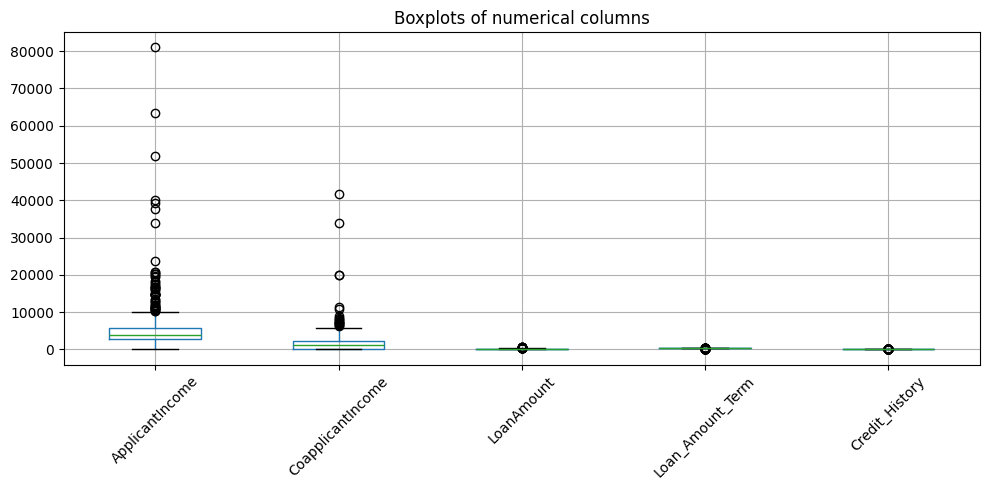

In [92]:
# Quick boxplot visualization for numeric columns
plt.figure(figsize=(10, 5))
train_df_copy[num_cols].boxplot(rot=45)
plt.title("Boxplots of numerical columns")
plt.tight_layout()
plt.show()

In [93]:
# IQR Capping (Winsorization)
for col in num_cols:
    Q1 = train_df_copy[col].quantile(0.25)
    Q3 = train_df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    # Cap values outside the bounds
    train_df_copy[col] = np.where(train_df_copy[col] < lower, lower,
                     np.where(train_df_copy[col] > upper, upper, train_df_copy[col]))

In [94]:
# IQR-based check AFTER capping
iqr_out_counts_new = {}
for col in num_cols:
    Q1 = train_df_copy[col].quantile(0.25)
    Q3 = train_df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    iqr_out_counts_new[col] = ((train_df_copy[col] < lower) | (train_df_copy[col] > upper)).sum()
iqr_out_counts_new = pd.Series(iqr_out_counts_new)
print("\nOutlier counts by column AFTER capping (IQR rule):")
print(iqr_out_counts_new[iqr_out_counts_new > 0] if iqr_out_counts_new.sum() > 0 else "No IQR outliers detected")


Outlier counts by column AFTER capping (IQR rule):
No IQR outliers detected


In [95]:
# Compare with previous IQR counts if available
if 'iqr_out_counts' in globals():
    compare_iqr = pd.concat(
        [iqr_out_counts.rename('before'), iqr_out_counts_new.rename('after')],
        axis=1
    )
    print("\nComparison of IQR outlier counts (before vs after capping):")
    display(compare_iqr)
else:
    print("No previous IQR outlier counts found.")


Comparison of IQR outlier counts (before vs after capping):


,before,after
ApplicantIncome,50,0
CoapplicantIncome,18,0
LoanAmount,41,0
Loan_Amount_Term,88,0
Credit_History,89,0


**Phase 2: Exploratory Data Analysis (EDA)**

In [96]:
# Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [100]:
train_df_copy['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    614
Name: count, dtype: int64

In [98]:
numerical_column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [99]:
desc_stats = pd.DataFrame({
    "Mean": train_df_copy[numerical_column].mean().round(2),
    "Median": train_df_copy[numerical_column].median().round(2),
    "mode": train_df_copy[numerical_column].mode().round(2),
    "Variance": train_df_copy[numerical_column].var().round(2),
    "Standard Deviation": train_df_copy[numerical_column].std().round(2),
    "Maximum": train_df_copy[numerical_column].max().round(2),
    "Minimum": train_df_copy[numerical_column].min().round(2),
    "Range": (train_df_copy[numerical_column].max() - train_df_copy[numerical_column].min()).round(2),
    "25th percentile": train_df_copy[numerical_column].quantile(), 
})

ValueError: Data must be 1-dimensional, got ndarray of shape (1, 5) instead